<a href="https://colab.research.google.com/github/rishsoraganvi/Lab-Practical-2023-2027/blob/main/IP_%26_CV_Lab_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment-1 :**
# Simulation and Display of an Image, Negative of an Image (Binary & Grey Scale)

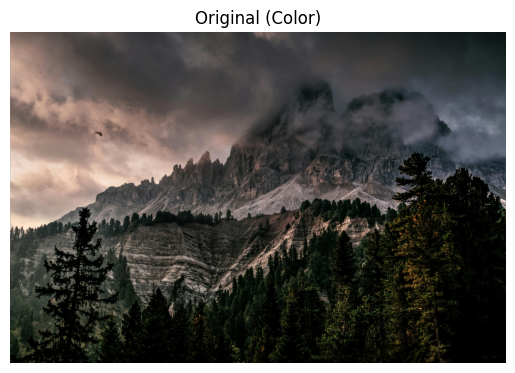

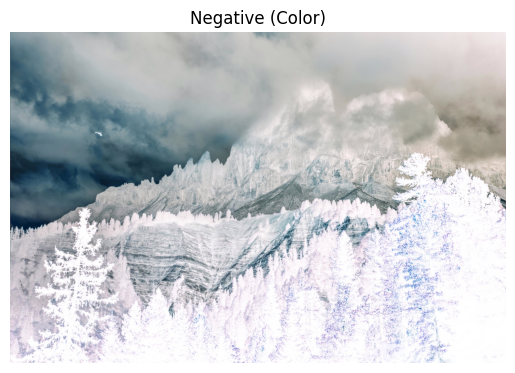

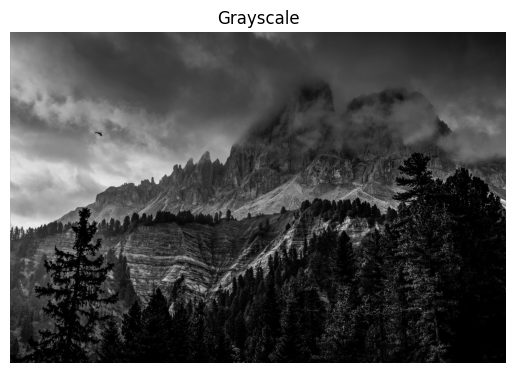

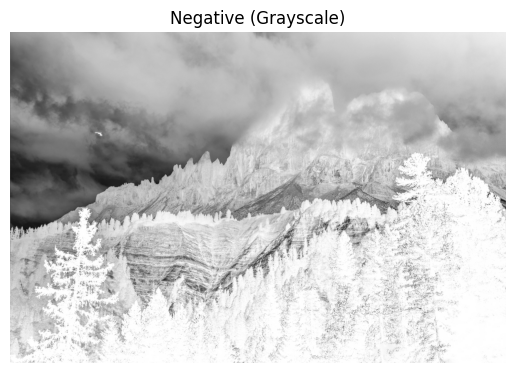

In [7]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/pexels-eberhardgross-640781.jpg"   # change this to your image path/name

img = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original (Color)")
plt.axis("off")
plt.show()

neg = 255 - img
plt.imshow(cv2.cvtColor(neg, cv2.COLOR_BGR2RGB))
plt.title("Negative (Color)")
plt.axis("off")
plt.show()

gray = cv2.imread(img_path, 0)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")
plt.show()

gray_neg = 255 - gray
plt.imshow(gray_neg, cmap="gray")
plt.title("Negative (Grayscale)")
plt.axis("off")
plt.show()

# _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# plt.imshow(binary, cmap="gray")
# plt.title("Binary")
# plt.axis("off")
# plt.show()

# binary_neg = 255 - binary
# plt.imshow(binary_neg, cmap="gray")
# plt.title("Negative (Binary)")
# plt.axis("off")
# plt.show()


Successfully loaded image from: /content/pexels-sohi-807598.jpg
Original Grayscale Image:
 [[60 50 47 ... 10 15 18]
 [69 58 52 ... 11 16 19]
 [69 57 52 ... 14 19 20]
 ...
 [20 20 20 ... 12 12 12]
 [14 14 14 ... 12 12 12]
 [14 14 15 ... 12 12 12]]

Binary Image (Thresholded at 128):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Binary Negative Image:
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]

Grayscale Negative Image:
 [[195 205 208 ... 245 240 237]
 [186 197 203 ... 244 239 236]
 [186 198 203 ... 241 236 235]
 ...
 [235 235 235 ... 243 243 243]
 [241 241 241 ... 243 243 243]
 [241 241 240 ... 243 243 243]]


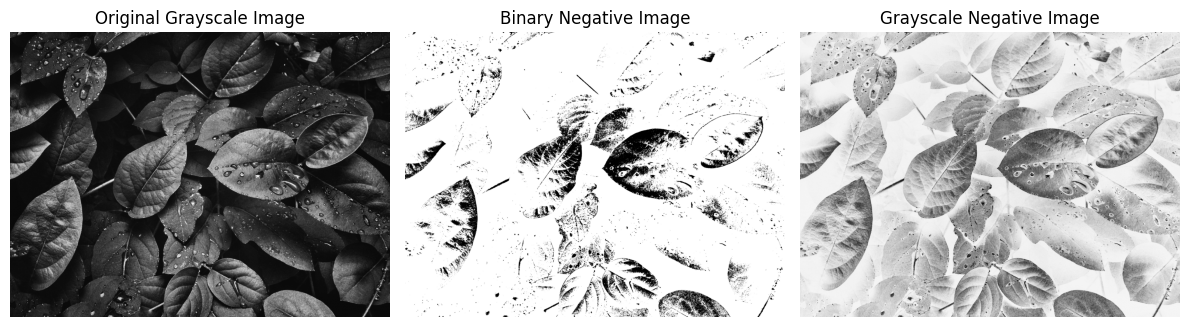

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

original_grayscale_image = None

# --- User-specified image path ---
# IMPORTANT: Replace 'path/to/your/image.jpg' with the actual path to your image file.
# If running in Colab, this usually means uploading the file to the Colab environment
# and then providing its path (e.g., '/content/your_image.jpg').
image_path = '/content/pexels-sohi-807598.jpg'  # <--- MODIFY THIS LINE WITH YOUR IMAGE PATH

# Try to load the image from the specified path
try:
    img = Image.open(image_path)
    # Convert to grayscale
    if img.mode != 'L':
        img = img.convert('L')
    original_grayscale_image = np.array(img, dtype=np.uint8)
    print(f'Successfully loaded image from: {image_path}')
except FileNotFoundError:
    print(f"Error: Image file not found at '{image_path}'.")
except Exception as e:
    print(f"Error loading image from '{image_path}': {e}")


if original_grayscale_image is None:
    print("Generating a simulated image instead.")
    # 1. Simulate a grayscale image (e.g., a gradient) if image loading failed
    image_size = (10, 10)
    original_grayscale_image = np.linspace(0, 255, num=image_size[0] * image_size[1], dtype=np.uint8).reshape(image_size)

print("Original Grayscale Image:\n", original_grayscale_image)

# 2. Display the original image
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(original_grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Grayscale Image')
plt.axis('off')

# 3. Generate a binary negative
# First, convert grayscale to binary (e.g., threshold at 128)
threshold = 128
binary_image = (original_grayscale_image > threshold).astype(np.uint8) * 255

# Compute binary negative (invert 0s and 1s)
binary_negative_image = 255 - binary_image # Invert 0 to 255 and 255 to 0

print("\nBinary Image (Thresholded at 128):\n", binary_image)
print("\nBinary Negative Image:\n", binary_negative_image)

plt.subplot(1, 3, 2)
plt.imshow(binary_negative_image, cmap='gray', vmin=0, vmax=255)
plt.title('Binary Negative Image')
plt.axis('off')

# 4. Generate a grayscale negative
# For 8-bit images (0-255), the negative is 255 - pixel_value
grayscale_negative_image = 255 - original_grayscale_image

print("\nGrayscale Negative Image:\n", grayscale_negative_image)

plt.subplot(1, 3, 3)
plt.imshow(grayscale_negative_image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale Negative Image')
plt.axis('off')

plt.tight_layout()
plt.show()